## Importing Libraries

In [1]:
import split_folders
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import seaborn as sns
from sklearn import metrics
from keras.preprocessing import image
from PIL import Image
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img

Using TensorFlow backend.


In [12]:
os.listdir('/home/ipc-admin/Documents/NOME/alien-vs-predator-images/data/')

['Validation',
 'train',
 '.ipynb_checkpoints',
 'test',
 'predator classification.ipynb']

Text(0.5, 1.0, 'This is my Alien Picture')

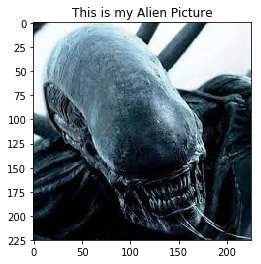

In [8]:
test_image = image.load_img('/home/ipc-admin/Documents/NOME/alien-vs-predator-images/data/train/alien/60.jpg')
plt.imshow(test_image)
plt.title('This is my Alien Picture')

Text(0.5, 1.0, 'This is my Predator Picture')

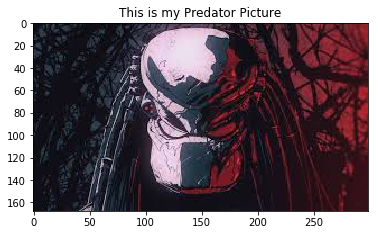

In [10]:
test_image = image.load_img('/home/ipc-admin/Documents/NOME/alien-vs-predator-images/data/train/predator/61.jpg')
plt.imshow(test_image)
plt.title('This is my Predator Picture')


### Rescaling my data

In [11]:
traindata = ImageDataGenerator(rescale=1./255)
testdata = ImageDataGenerator(rescale=1./255)

### Retrieving Data from train , test and val directory 
### Setting the image size to 64x64 pixels

In [13]:
trainingdata = traindata.flow_from_directory('/home/ipc-admin/Documents/NOME/alien-vs-predator-images/data/train/',
                                             batch_size=32,
                                             target_size=(64,64),
                                             class_mode=('binary') 
                                            )
validation_generator = testdata.flow_from_directory('/home/ipc-admin/Documents/NOME/alien-vs-predator-images/data/Validation/',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

test_set = testdata.flow_from_directory('/home/ipc-admin/Documents/NOME/alien-vs-predator-images/data/test/',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 694 images belonging to 2 classes.
Found 94 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


### Making a Convolutional Neural Network Model

In [26]:
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Flatten())
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'sigmoid', units = 1))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Feeding Data to the CNN Model

In [22]:
cnn_model = cnn.fit_generator(trainingdata,
                         steps_per_epoch = 70,
                         epochs = 10,
                         validation_data = validation_generator,
                         validation_steps = 200)

Epoch 1/10
70/70 [==============================] - 11s 163ms/step - loss: 3.1878e-05 - acc: 1.0000 - val_loss: 2.6664e-05 - val_acc: 1.0000
Epoch 2/10
70/70 [==============================] - 11s 161ms/step - loss: 2.9285e-05 - acc: 1.0000 - val_loss: 2.5143e-05 - val_acc: 1.0000
Epoch 3/10
70/70 [==============================] - 11s 162ms/step - loss: 2.8057e-05 - acc: 1.0000 - val_loss: 2.3678e-05 - val_acc: 1.0000
Epoch 4/10
70/70 [==============================] - 11s 162ms/step - loss: 2.7230e-05 - acc: 1.0000 - val_loss: 2.2445e-05 - val_acc: 1.0000
Epoch 5/10
70/70 [==============================] - 12s 165ms/step - loss: 2.3992e-05 - acc: 1.0000 - val_loss: 2.0910e-05 - val_acc: 1.0000
Epoch 6/10
70/70 [==============================] - 11s 164ms/step - loss: 2.4282e-05 - acc: 1.0000 - val_loss: 1.9655e-05 - val_acc: 1.0000
Epoch 7/10
70/70 [==============================] - 12s 165ms/step - loss: 2.2143e-05 - acc: 1.0000 - val_loss: 1.8509e-05 - val_acc: 1.0000
Epoch 8/10
70

### Test Accuracy

In [23]:
test_accu = cnn.evaluate_generator(test_set,steps=500)

print('The testing accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 72.98906950672645 %


### Visualizing Training and validation loss

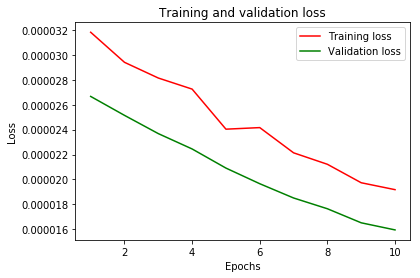

In [27]:
loss = cnn_model.history['loss']
val_loss = cnn_model.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Visualizing Training and validation accuracy

### Test Image

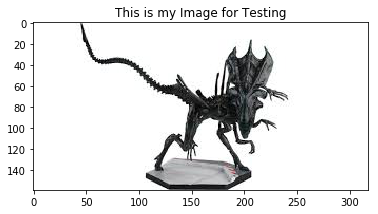

In [49]:
test_image = image.load_img('/home/ipc-admin/Documents/NOME/alien-vs-predator-images/data/test/alien/60.jpg')
plt.imshow(test_image)
plt.title('This is my Image for Testing')
test_image = test_image.resize((64, 64), Image.ANTIALIAS)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

### Predicting test image

In [50]:
value = cnn.predict_classes(test_image)

In [51]:
value

array([[0]], dtype=int32)

In [52]:
if value[0][0]==1:
    print("Predator")
else:
    print("Alien")

Alien
